# Titanic Kaggle Competition - Prediction of who survived and who died?

### Importing Packages

In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler,
    MinMaxScaler
)
import warnings
warnings.filterwarnings("ignore")

### Reading CSV File 

* Survival - Survival (0 = No; 1 = Yes). Not included in test.csv file.
* Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* Name - Name
* Sex - Sex
* Age - Age
* Sibsp - Number of Siblings/Spouses Aboard
* Parch - Number of Parents/Children Aboard 
* Ticket - Ticket Number
* Fare - Passenger Fare
* Cabin - Cabin
* Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [2]:
full_data = pd.read_csv('./data/train.csv', index_col= 0)

In [3]:
full_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Splitting Data in Train and Validation

In [4]:
train, validation = train_test_split(full_data,test_size= 0.2, random_state= 42)

In [5]:
train = train.reset_index(drop= True)
validation = validation.reset_index(drop= True)

## EDA of the Train - Data

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Name      712 non-null    object 
 3   Sex       712 non-null    object 
 4   Age       572 non-null    float64
 5   SibSp     712 non-null    int64  
 6   Parch     712 non-null    int64  
 7   Ticket    712 non-null    object 
 8   Fare      712 non-null    float64
 9   Cabin     159 non-null    object 
 10  Embarked  710 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 61.3+ KB


In [7]:
# categorize features in numerical and categorical
categorical_values = train.select_dtypes("object").columns
numerical_values = train.select_dtypes("number").columns
print(f"Categorical: {categorical_values}")
print(f"Numerical : {numerical_values}")

Categorical: Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')
Numerical : Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [8]:
missing_values = (1 - train.count()/train.count().max()) * 100
missing_values

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.662921
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.668539
Embarked     0.280899
dtype: float64

Missing values: 

* Age: 19,67%,
* Cabin: 77,67%,
* Embarked: 0,23%

In [9]:
train.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
422,1,2,"Becker, Miss. Marion Louise",female,4.0,2,1,230136,39.000,F4,S
161,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.250,NaN,S
355,0,3,"Eklund, Mr. Hans Linus",male,16.0,0,0,347074,7.775,NaN,S
347,1,2,"Richards, Master. William Rowe",male,3.0,1,1,29106,18.750,NaN,S
561,0,3,"Gustafsson, Mr. Johan Birger",male,28.0,2,0,3101277,7.925,NaN,S


Survived
0    62.36
1    37.64
dtype: float64

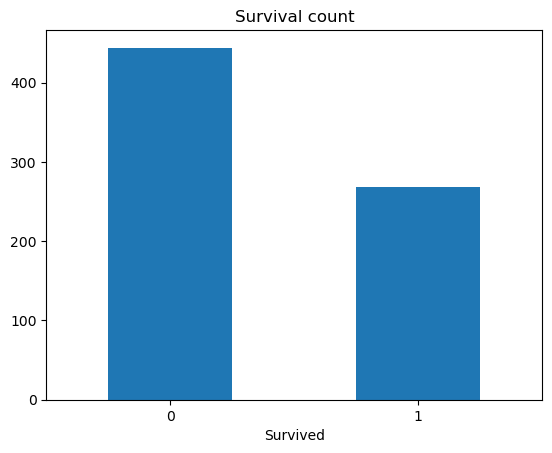

In [25]:
# Calculating the number of surviving/non-surviving passengers and displaying it as a bar plot
train.value_counts("Survived").plot(kind= "bar", rot= 0, title= "Survival count");
round(train.value_counts("Survived", normalize= True)*100, 2)# percentage of survival

In [11]:
train.value_counts("Survived")

Survived
0    444
1    268
dtype: int64

In [13]:
# Calculating the proportion of surviving 1st class passengers to the total number of 1st class passengers
total_number_first_class = (train['Pclass'] == 1).sum()
total_number_first_class

163

In [14]:

surviving_total_number_first_class = ((train['Pclass'] == 1) & (train['Survived'] == 1)).sum()
surviving_total_number_first_class 

99

In [16]:

proportion = total_number_first_class/surviving_total_number_first_class
round(proportion, 2)


1.65

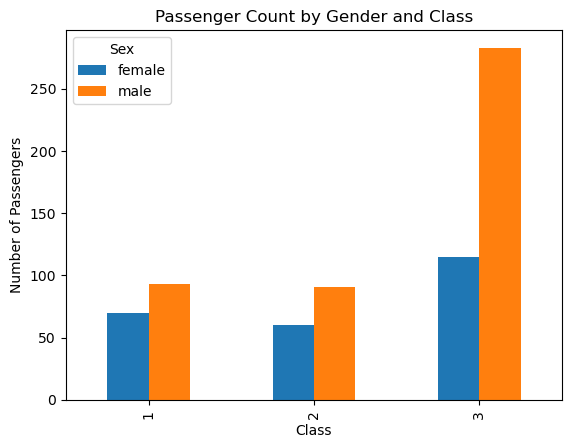

In [18]:
# Creating a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers
gender_vs_class = train.groupby(['Sex', 'Pclass']).size().reset_index(name='counts')
gender_vs_class_pivot = gender_vs_class.pivot(index='Pclass', columns='Sex', values='counts')
gender_vs_class_pivot.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Passengers')
plt.title('Passenger Count by Gender and Class')
plt.show()

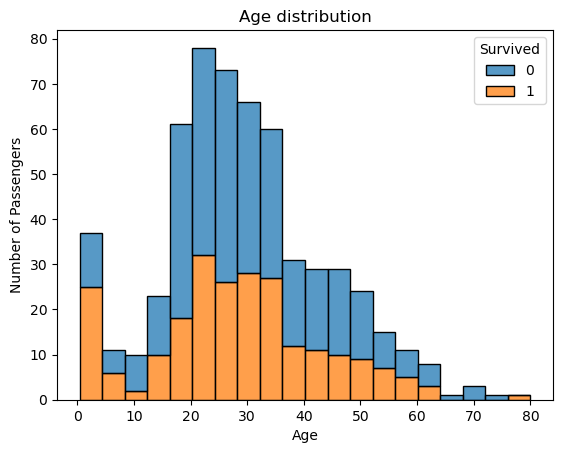

In [19]:
# Creating a histogram showing the age distribution of passengers -  Comparing surviving/non-surviving passengers
sns.histplot(data=train,
             x= 'Age',
             hue= 'Survived',
             multiple='stack'
            )
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Age distribution');

In [22]:
# Average age grouped by surviving status
mean_ages = train.groupby(['Survived'])['Age'].mean()
print(mean_ages) 

Survived
0    30.213235
1    28.451897
Name: Age, dtype: float64


In [24]:
# Creating a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class 
table_class_survivior = train.groupby(['Pclass']).value_counts(['Survived'])
pd.DataFrame(table_class_survivior)

0
Pclass Survived     
1      1          99
       0          64
2      0          78
       1          73
3      0         302
       1          96

In [33]:
# Creating a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female
table_class_survivor = pd.crosstab(index=[train['Pclass'], train['Sex']], columns=train['Survived'], margins=True)

# Rename the columns for better interpretation
table_class_survivor.columns = ['Dead', 'Survived', 'Total']

pd.DataFrame(table_class_survivor)


Dead  Survived  Total
Pclass Sex                          
1      female     3        67     70
       male      61        32     93
2      female     2        58     60
       male      76        15     91
3      female    59        56    115
       male     243        40    283
All             444       268    712

#### EDA Summary of the Findings in the Test Data:
- 62.36% of the total number of passengers died (444 People)
- biggest age group: between 18 and 35
- there were more male passenger on the ship
- Factors for survivial: 
    - age: children 
    - gender: woman had a higher chance of survivial in the first and second class
    - passenger class: in the third class the survivial rate for women was about 50:50, most men died in the third class

### Feature-Target Separation

In [35]:
num_features = [
    'Pclass', 
    'Age', 
    'SibSp', 
    'Parch', 
    'Fare'
]

cat_features = [
    #'Name', 
    'Sex', 
    #'Ticket', 
    #'Cabin', 
    'Embarked'
]

features = num_features + cat_features

target = 'Survived'

X_train, y_train = train[features], train[target]

In [36]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,1,45.5,0,0,28.5000,male,S
1,2,23.0,0,0,13.0000,male,S
2,3,32.0,0,0,7.9250,male,S
3,3,26.0,1,0,7.8542,male,S
4,3,6.0,4,2,31.2750,female,S


In [37]:
y_train

0      0
1      0
2      0
3      0
4      0
      ..
707    1
708    0
709    0
710    1
711    0
Name: Survived, Length: 712, dtype: int64

### Defining Pipeline for Feature Engineering

**numerical columns**

In [38]:
num_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaling', StandardScaler())
    ]) 

**categorical columns**

In [39]:
cat_transformer = Pipeline(
    steps=[
        ('onehot', OneHotEncoder(drop='first'))
    ])

**total preprocessing**

In [40]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num_transformer', num_transformer, num_features),
        ('cat_transformer', cat_transformer, cat_features)
    ])

### Defining Pipleline for Model Building

**instantiate model**

In [41]:
classifier_model = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression())
    ])

**train model**

In [42]:
classifier_model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('cat_transformer',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Sex', 'Embarked'])])),
                ('classifier', LogisticRegression())])

**model validation**

In [43]:
training_acccuracy = classifier_model.score(X_train,y_train)
print(f"training accuracy: {round(training_acccuracy, 6)}")  

training accuracy: 0.801966


### Model Evaluation with Test- Data

**feature-target separation**

In [46]:
X_validation, y_validation = validation[features], validation[target]

In [47]:
X_test

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,3,NaN,1,1,15.2458,male,C
1,2,31.0,0,0,10.5000,male,S
2,3,20.0,0,0,7.9250,male,S
3,2,6.0,0,1,33.0000,female,S
4,3,14.0,1,0,11.2417,female,C
...,...,...,...,...,...,...,...
174,3,17.0,0,0,7.1250,male,S
175,3,NaN,0,0,7.2250,male,C
176,3,38.0,1,5,31.3875,female,S
177,2,17.0,0,0,10.5000,female,S


In [48]:
test_acccuracy = classifier_model.score(X_validation,y_validation)
print(f"test accuracy: {round(test_acccuracy, 6)}")

test accuracy: 0.810056


### Retraining the model with the complete Dataset

In [49]:
X_full_data, y_full_data = full_data[features], full_data[target]

In [50]:
classifier_model.fit(X_full_data,y_full_data)  

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('cat_transformer',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Sex', 'Embarked'])])),
                ('classifier', LogisticRegression())])

In [52]:
training_acccuracy = classifier_model.score(X_full_data,y_full_data)
print(f"training accuracy: {round(training_acccuracy, 6)}")  

training accuracy: 0.801347


### Kaggle Test-Data

In [54]:
kaggle_test = pd.read_csv('./data/test.csv',index_col= 0)

In [55]:
X_kaggle_test = kaggle_test[features]

In [56]:
y_kaggle_pred = classifier_model.predict(X_kaggle_test)

In [57]:
kaggle_test.reset_index(inplace=True)

In [59]:
output = pd.DataFrame({'PassengerId': kaggle_test.PassengerId,'Survived': y_kaggle_pred})
output.to_csv('./data/submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


# SUBMISSION IN KAGGLE = 0,77033 Accuracy